In [2]:
# import all libraries
import pandas as pd
import numpy as np

#import nltk libraries for NLP
import nltk
from nltk.corpus import stopwords
from nltk  import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

#import seaborn for plotting
import seaborn as sns

#import libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [4]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

In [8]:
#load the tweet data from csv file
df = pd.read_csv("train_E6oV3lV.csv",encoding = 'utf-8')
test_tweets = pd.read_csv("test_tweets_anuFYb8.csv",encoding = 'utf-8')

In [4]:
#drop the id columm, it is irrelevant
df.drop(columns = 'id',inplace = True)
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


C:\Users\SARIKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

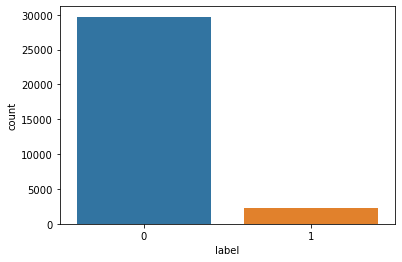

In [5]:
sns.countplot(df["label"])

In [7]:
sns.barplot('label','length',data = df,palette='PRGn')

C:\Users\SARIKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'length'

## Data Cleaning

In [10]:

# Clean the tweets    
df['cleaned_tweet'] = df['tweet'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].replace("  ", " ")

test_tweets['cleaned_tweet'] = test_tweets['tweet'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
test_tweets['cleaned_tweet'] = test_tweets['cleaned_tweet'].replace("  ", " ")

words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]


def cleantext(df, words_to_remove = words_remove): 
    ### dont change the original tweet
    # remove emoticons form the tweets
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'<ed>','', regex = True)
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)
    
    # convert tweets to lowercase
    df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()
    
    #remove user mentions
    #df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(@\w+)',"", regex=True)
    
    #remove 'user' in the beginning
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'(@user+)',"", regex=True)
    
    #remove_symbols
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

    #remove_URL(x):
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'https.*$', "", regex = True)

    #remove 'amp' in the text
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'amp',"", regex = True)
    
    #remove words of length 1 or 2 
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

    #remove extra spaces in the tweet
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^\s+|\s+$'," ", regex=True)
     
    #remove_digits
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[0-9]', "", regex=True)
    
    #remove stopwords and words_to_remove
    stop_words = set(stopwords.words('english'))
    mystopwords = [stop_words, "via", words_to_remove]
    
    df['fully_cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
    

    return df

#get the processed tweets
df = cleantext(df)


C:\Users\SARIKA\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:178: FutureWarning: Possible nested set at position 1
  re.compile(obj)


In [11]:
test_tweets = cleantext(test_tweets)

In [12]:
df

,id,label,tweet,cleaned_tweet,fully_cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish dr...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they ...,thanks for lyft credit cant use cause they don...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with all the time,model love take with all the time
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner the airwaves trying wrap he...,see nina turner the airwaves trying wrap herse...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw wor...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso conde...,sikh temple vandalised calgary wso condemns act


## Tokenization

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
df['tweet_token'] = df['fully_cleaned_tweet'].apply(word_tokenize)
df

,id,label,tweet,cleaned_tweet,fully_cleaned_tweet,tweet_token
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish dr...,when father dysfunctional and selfish drags hi...,"[when, father, dysfunctional, and, selfish, dr..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they ...,thanks for lyft credit cant use cause they don...,"[thanks, for, lyft, credit, cant, use, cause, ..."
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,model love take with all the time,model love take with all the time,"[model, love, take, with, all, the, time]"
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]"
...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu,ate isz that youuu,"[ate, isz, that, youuu]"
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner the airwaves trying wrap he...,see nina turner the airwaves trying wrap herse...,"[see, nina, turner, the, airwaves, trying, wra..."
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw wor...,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso conde...,sikh temple vandalised calgary wso condemns act,"[sikh, temple, vandalised, calgary, wso, conde..."


In [15]:
test_tweets['tweet_token'] = test_tweets['fully_cleaned_tweet'].apply(word_tokenize)

## Normalizing Words
**We will use lemmatization, but we cannot do this without POS tagging, so created a function to return the lemmetizor tags and then return the lemma of the word list**

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
def get_wordnet_pos(treebank_tag):
    #return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
            # As default pos in lemmatization is Noun
        return wordnet.NOUN

def pos_tag_1(tokens):
        # find the pos tagginf for each tokens [('What', 'WP'), ('can', 'MD'), ('I', 'PRP') ....
    lemma = []
    for word, tag in pos_tag(tokens):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
    #lemma = lemmatizer.lemmatize(word, wntag) 
        if not wntag:
            lemma.append(word)
        else:
            lemma.append(lemmatizer.lemmatize(word, wntag))
    return lemma

In [19]:
df['text_lemmatized'] = df.tweet_token.apply(lambda x: pos_tag_1(x))

In [20]:
test_tweets['text_lemmatized'] = test_tweets.tweet_token.apply(lambda x: pos_tag_1(x))

In [21]:
df[['tweet_token','text_lemmatized']]

,tweet_token,text_lemmatized
0,"[when, father, dysfunctional, and, selfish, dr...","[when, father, dysfunctional, and, selfish, dr..."
1,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, for, lyft, credit, cant, use, cause, ..."
2,"[bihday, your, majesty]","[bihday, your, majesty]"
3,"[model, love, take, with, all, the, time]","[model, love, take, with, all, the, time]"
4,"[factsguide, society, now, motivation]","[factsguide, society, now, motivation]"
...,...,...
31957,"[ate, isz, that, youuu]","[ate, isz, that, youuu]"
31958,"[see, nina, turner, the, airwaves, trying, wra...","[see, nina, turner, the, airwave, try, wrap, h..."
31959,"[listening, sad, songs, monday, morning, otw, ...","[listen, sad, song, monday, morning, otw, work..."
31960,"[sikh, temple, vandalised, calgary, wso, conde...","[sikh, temple, vandalise, calgary, wso, condem..."


In [22]:
df

,id,label,tweet,cleaned_tweet,fully_cleaned_tweet,tweet_token,text_lemmatized
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish dr...,when father dysfunctional and selfish drags hi...,"[when, father, dysfunctional, and, selfish, dr...","[when, father, dysfunctional, and, selfish, dr..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cant use cause they ...,thanks for lyft credit cant use cause they don...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, for, lyft, credit, cant, use, cause, ..."
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,model love take with all the time,model love take with all the time,"[model, love, take, with, all, the, time]","[model, love, take, with, all, the, time]"
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, now, motivation]"
...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu,ate isz that youuu,"[ate, isz, that, youuu]","[ate, isz, that, youuu]"
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner the airwaves trying wrap he...,see nina turner the airwaves trying wrap herse...,"[see, nina, turner, the, airwaves, trying, wra...","[see, nina, turner, the, airwave, try, wrap, h..."
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw wor...,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ...","[listen, sad, song, monday, morning, otw, work..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso conde...,sikh temple vandalised calgary wso condemns act,"[sikh, temple, vandalised, calgary, wso, conde...","[sikh, temple, vandalise, calgary, wso, condem..."


In [23]:
df['final_tweet'] = df['text_lemmatized'].apply(lambda x: ' '.join(word for word in x))
test_tweets['final_tweet'] = test_tweets['text_lemmatized'].apply(lambda x: ' '.join(word for word in x))

In [24]:
train = df[['final_tweet']]
target = df['label']

In [25]:
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.3, random_state=2019)

In [26]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((22373, 1), (9589, 1), (22373,), (9589,))

## Vectorize the tweets

In [28]:
vec = TfidfVectorizer(stop_words ='english')

In [29]:
X_train_tfidf = vec.fit_transform(train['final_tweet'])

In [30]:
X_train_tfidf.shape

(31962, 35077)

In [31]:
x_val_tfidf = vec.transform(x_val['final_tweet'])

In [32]:
x_val_tfidf.shape

(9589, 35077)

In [33]:
x_val_tfidf

<9589x35077 sparse matrix of type '<class 'numpy.float64'>'
	with 63313 stored elements in Compressed Sparse Row format>

In [35]:
test_tweets_tfidf = vec.transform(test_tweets['final_tweet'])

## Applying ML Model - Logistics Regression

In [34]:

clf_log = LogisticRegression(random_state=2019, C=1000).fit(X_train_tfidf, target)

C:\Users\SARIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
y_pred_val = clf_log.predict(x_val_tfidf)
y_pred_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
print("Logistics Regression F1 score : ",(f1_score(y_val,y_pred_val , average='macro'))*100,"%")

Logistics Regression F1 score :  99.88628756592658 %


In [38]:
test_tweets['label'] = clf_log.predict(test_tweets_tfidf)

In [39]:
test_tweets

,id,tweet,cleaned_tweet,fully_cleaned_tweet,tweet_token,text_lemmatized,final_tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedic...,studiolife aislife requires passion dedication...,"[studiolife, aislife, requires, passion, dedic...","[studiolife, aislife, require, passion, dedica...",studiolife aislife require passion dedication ...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone see the ne...,white supremacists want everyone see the new b...,"[white, supremacists, want, everyone, see, the...","[white, supremacist, want, everyone, see, the,...",white supremacist want everyone see the new bi...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your acne altwaystoheal...,safe ways heal your acne altwaystoheal healthy...,"[safe, ways, heal, your, acne, altwaystoheal, ...","[safe, way, heal, your, acne, altwaystoheal, h...",safe way heal your acne altwaystoheal healthy ...,0
3,31966,is the hp and the cursed child book up for res...,the and the cursed child book for reservati...,the and the cursed child book for reservations...,"[the, and, the, cursed, child, book, for, rese...","[the, and, the, cursed, child, book, for, rese...",the and the cursed child book for reservation ...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ah...,rd bihday amazing hilarious nephew eli ahmir u...,"[rd, bihday, amazing, hilarious, nephew, eli, ...","[rd, bihday, amaze, hilarious, nephew, eli, ah...",rd bihday amaze hilarious nephew eli ahmir unc...,0
...,...,...,...,...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory leftright polarisation trum...,thought factory leftright polarisation trump u...,"[thought, factory, leftright, polarisation, tr...","[thought, factory, leftright, polarisation, tr...",thought factory leftright polarisation trump u...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid hairflip neverrea...,feeling like mermaid hairflip neverready forma...,"[feeling, like, mermaid, hairflip, neverready,...","[feel, like, mermaid, hairflip, neverready, fo...",feel like mermaid hairflip neverready formal w...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary caigned today ohioomg used word...,hillary caigned today ohioomg used words like ...,"[hillary, caigned, today, ohioomg, used, words...","[hillary, caigned, today, ohioomg, use, word, ...",hillary caigned today ohioomg use word like as...,0
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset leads c...,happy work conference right mindset leads cult...,"[happy, work, conference, right, mindset, lead...","[happy, work, conference, right, mindset, lead...",happy work conference right mindset lead cultu...,0


In [40]:
final_tweets = test_tweets[['id','label']]

In [41]:
final_tweets.to_csv("submission.csv",index = False)